## Explaination

This notebook calculate the monthly average wave period from the dataset, the period of wave is related to the magnitude of the wave and how will the marine vessel moves with the wave. Here we calculate the average wave period of the month and visualze it on the map. The resulted image is at the end of this notebook.

Note that I developed this code with Pycharm, so when moving it from Pycharm to the Jupyter Notebook, the progress bar won't work. I have to find an alternative way to implement a simple progress bar to show the progress, otherwise we don't know if the code is working as expected. So you will notice the code for the progress bar is different in this notebook, the other part remain the same.

## Import Library

In [45]:
import os
os.environ['PROJ_LIB'] = '/Users/Krasus/miniconda3/envs/Wave/share/proj'
from pathlib import Path
import matplotlib.pyplot as plt
import pygrib
from progress.bar import Bar
from mpl_toolkits.basemap import Basemap
from ipywidgets import IntProgress
from IPython.display import *

## Define Input Path

In [ ]:
Date=input('Enter:yyyyMM\n')
type = 'tp'
target = 'multi_1.glo_30m.' + type + '.' + Date + '.grb2'
datapath = './'+Date+'/gribs/'+target

## set up Range

In [ ]:
llclon=122.04945
llclat=2.05
urclon=240.25024
urclat=63.50602

## Input & Decode

In [ ]:
name = 'Primary wave mean period (s)'
outpath='./AnalysisResult/'+Date+'/'
print('Store in: '+outpath)
Path(outpath).mkdir(parents=True, exist_ok=True)

gribs = pygrib.open(datapath)
for grb in gribs:
    grb
M_Num=gribs.tell()-1

## Calculate Average

In [46]:
skiped = 0
data = 0
bar=IntProgress(min=1,max=M_Num)
display(bar)

for N in range(M_Num):
    grb1 = gribs.select(name='Primary wave mean period')[N]
    grb2 = gribs.select(name='Primary wave mean period')[N+1]
    if grb1.validDate == grb2.validDate:
        print("\nSkip %d th value because of redundant" %(N+1))
        skiped += 1
        continue
    sel_data,lat,lon=grb1.data(llclat,urclat,llclon,urclon)
    data=data+sel_data
    bar.value+=1
    display(bar)
    
average = data/(M_Num-skiped)
data,lat,lon=grb.data(llclat,urclat,llclon,urclon)
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(),urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='c')
x,y = m(lon,lat)
m.pcolormesh(x,y,data, shading='flat', cmap=plt.cm.jet)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawstates()
m.colorbar(location='right')
pname=Date
extension='.png'
#plt.title(Date+' Significant wave height'+' average= '+str(average.mean())+' m')
plt.title("{Dtime} Primary wave mean period {ave:.2f} s".format(Dtime=Date, ave=average.mean()))
plt.savefig(outpath+pname+extension,dpi=326)
plt.clf()
plt.close()
print('Output'+pname+' Successful!')
#print("Montly average wave height: "+str(average.mean())+" m")
print("Primary wave mean period {ave:.2f} s".format(ave=average.mean()))

Enter:yyyyMM
201801
Store in: ./AnalysisResult/201801/


IntProgress(value=0, max=249)

IntProgress(value=1, max=249)

IntProgress(value=2, max=249)

IntProgress(value=3, max=249)

IntProgress(value=4, max=249)

IntProgress(value=5, max=249)

IntProgress(value=6, max=249)

IntProgress(value=7, max=249)

IntProgress(value=8, max=249)

IntProgress(value=9, max=249)

IntProgress(value=10, max=249)

IntProgress(value=11, max=249)

IntProgress(value=12, max=249)

IntProgress(value=13, max=249)

IntProgress(value=14, max=249)

IntProgress(value=15, max=249)

IntProgress(value=16, max=249)

IntProgress(value=17, max=249)

IntProgress(value=18, max=249)

IntProgress(value=19, max=249)

IntProgress(value=20, max=249)

IntProgress(value=21, max=249)

IntProgress(value=22, max=249)

IntProgress(value=23, max=249)

IntProgress(value=24, max=249)

IntProgress(value=25, max=249)

IntProgress(value=26, max=249)

IntProgress(value=27, max=249)

IntProgress(value=28, max=249)

IntProgress(value=29, max=249)

IntProgress(value=30, max=249)

IntProgress(value=31, max=249)

IntProgress(value=32, max=249)

IntProgress(value=33, max=249)

IntProgress(value=34, max=249)

IntProgress(value=35, max=249)

IntProgress(value=36, max=249)

IntProgress(value=37, max=249)

IntProgress(value=38, max=249)

IntProgress(value=39, max=249)

IntProgress(value=40, max=249)

IntProgress(value=41, max=249)

IntProgress(value=42, max=249)

IntProgress(value=43, max=249)

IntProgress(value=44, max=249)

IntProgress(value=45, max=249)

IntProgress(value=46, max=249)

IntProgress(value=47, max=249)

IntProgress(value=48, max=249)

IntProgress(value=49, max=249)

IntProgress(value=50, max=249)

IntProgress(value=51, max=249)

IntProgress(value=52, max=249)

IntProgress(value=53, max=249)

IntProgress(value=54, max=249)

IntProgress(value=55, max=249)

IntProgress(value=56, max=249)

IntProgress(value=57, max=249)

IntProgress(value=58, max=249)

IntProgress(value=59, max=249)

IntProgress(value=60, max=249)

IntProgress(value=61, max=249)

IntProgress(value=62, max=249)

IntProgress(value=63, max=249)

IntProgress(value=64, max=249)

IntProgress(value=65, max=249)

IntProgress(value=66, max=249)

IntProgress(value=67, max=249)

IntProgress(value=68, max=249)

IntProgress(value=69, max=249)

IntProgress(value=70, max=249)

IntProgress(value=71, max=249)

IntProgress(value=72, max=249)

IntProgress(value=73, max=249)

IntProgress(value=74, max=249)

IntProgress(value=75, max=249)

IntProgress(value=76, max=249)

IntProgress(value=77, max=249)

IntProgress(value=78, max=249)

IntProgress(value=79, max=249)

IntProgress(value=80, max=249)

IntProgress(value=81, max=249)

IntProgress(value=82, max=249)

IntProgress(value=83, max=249)

IntProgress(value=84, max=249)

IntProgress(value=85, max=249)

IntProgress(value=86, max=249)

IntProgress(value=87, max=249)

IntProgress(value=88, max=249)

IntProgress(value=89, max=249)

IntProgress(value=90, max=249)

IntProgress(value=91, max=249)

IntProgress(value=92, max=249)

IntProgress(value=93, max=249)

IntProgress(value=94, max=249)

IntProgress(value=95, max=249)

IntProgress(value=96, max=249)

IntProgress(value=97, max=249)

IntProgress(value=98, max=249)

IntProgress(value=99, max=249)

IntProgress(value=100, max=249)

IntProgress(value=101, max=249)

IntProgress(value=102, max=249)

IntProgress(value=103, max=249)

IntProgress(value=104, max=249)

IntProgress(value=105, max=249)

IntProgress(value=106, max=249)

IntProgress(value=107, max=249)

IntProgress(value=108, max=249)

IntProgress(value=109, max=249)

IntProgress(value=110, max=249)

IntProgress(value=111, max=249)

IntProgress(value=112, max=249)

IntProgress(value=113, max=249)

IntProgress(value=114, max=249)

IntProgress(value=115, max=249)

IntProgress(value=116, max=249)

IntProgress(value=117, max=249)

IntProgress(value=118, max=249)

IntProgress(value=119, max=249)

IntProgress(value=120, max=249)

IntProgress(value=121, max=249)

IntProgress(value=122, max=249)

IntProgress(value=123, max=249)

IntProgress(value=124, max=249)

IntProgress(value=125, max=249)

IntProgress(value=126, max=249)

IntProgress(value=127, max=249)

IntProgress(value=128, max=249)


Skip 129 th value because of redundant


IntProgress(value=129, max=249)

IntProgress(value=130, max=249)

IntProgress(value=131, max=249)

IntProgress(value=132, max=249)

IntProgress(value=133, max=249)

IntProgress(value=134, max=249)

IntProgress(value=135, max=249)

IntProgress(value=136, max=249)

IntProgress(value=137, max=249)

IntProgress(value=138, max=249)

IntProgress(value=139, max=249)

IntProgress(value=140, max=249)

IntProgress(value=141, max=249)

IntProgress(value=142, max=249)

IntProgress(value=143, max=249)

IntProgress(value=144, max=249)

IntProgress(value=145, max=249)

IntProgress(value=146, max=249)

IntProgress(value=147, max=249)

IntProgress(value=148, max=249)

IntProgress(value=149, max=249)

IntProgress(value=150, max=249)

IntProgress(value=151, max=249)

IntProgress(value=152, max=249)

IntProgress(value=153, max=249)

IntProgress(value=154, max=249)

IntProgress(value=155, max=249)

IntProgress(value=156, max=249)

IntProgress(value=157, max=249)

IntProgress(value=158, max=249)

IntProgress(value=159, max=249)

IntProgress(value=160, max=249)

IntProgress(value=161, max=249)

IntProgress(value=162, max=249)

IntProgress(value=163, max=249)

IntProgress(value=164, max=249)

IntProgress(value=165, max=249)

IntProgress(value=166, max=249)

IntProgress(value=167, max=249)

IntProgress(value=168, max=249)

IntProgress(value=169, max=249)

IntProgress(value=170, max=249)

IntProgress(value=171, max=249)

IntProgress(value=172, max=249)

IntProgress(value=173, max=249)

IntProgress(value=174, max=249)

IntProgress(value=175, max=249)

IntProgress(value=176, max=249)

IntProgress(value=177, max=249)

IntProgress(value=178, max=249)

IntProgress(value=179, max=249)

IntProgress(value=180, max=249)

IntProgress(value=181, max=249)

IntProgress(value=182, max=249)

IntProgress(value=183, max=249)

IntProgress(value=184, max=249)

IntProgress(value=185, max=249)

IntProgress(value=186, max=249)

IntProgress(value=187, max=249)

IntProgress(value=188, max=249)

IntProgress(value=189, max=249)

IntProgress(value=190, max=249)

IntProgress(value=191, max=249)

IntProgress(value=192, max=249)

IntProgress(value=193, max=249)

IntProgress(value=194, max=249)

IntProgress(value=195, max=249)

IntProgress(value=196, max=249)

IntProgress(value=197, max=249)

IntProgress(value=198, max=249)

IntProgress(value=199, max=249)

IntProgress(value=200, max=249)

IntProgress(value=201, max=249)

IntProgress(value=202, max=249)

IntProgress(value=203, max=249)

IntProgress(value=204, max=249)

IntProgress(value=205, max=249)

IntProgress(value=206, max=249)

IntProgress(value=207, max=249)

IntProgress(value=208, max=249)

IntProgress(value=209, max=249)

IntProgress(value=210, max=249)

IntProgress(value=211, max=249)

IntProgress(value=212, max=249)

IntProgress(value=213, max=249)

IntProgress(value=214, max=249)

IntProgress(value=215, max=249)

IntProgress(value=216, max=249)

IntProgress(value=217, max=249)

IntProgress(value=218, max=249)

IntProgress(value=219, max=249)

IntProgress(value=220, max=249)

IntProgress(value=221, max=249)

IntProgress(value=222, max=249)

IntProgress(value=223, max=249)

IntProgress(value=224, max=249)

IntProgress(value=225, max=249)

IntProgress(value=226, max=249)

IntProgress(value=227, max=249)

IntProgress(value=228, max=249)

IntProgress(value=229, max=249)

IntProgress(value=230, max=249)

IntProgress(value=231, max=249)

IntProgress(value=232, max=249)

IntProgress(value=233, max=249)

IntProgress(value=234, max=249)

IntProgress(value=235, max=249)

IntProgress(value=236, max=249)

IntProgress(value=237, max=249)

IntProgress(value=238, max=249)

IntProgress(value=239, max=249)

IntProgress(value=240, max=249)

IntProgress(value=241, max=249)

IntProgress(value=242, max=249)

IntProgress(value=243, max=249)

IntProgress(value=244, max=249)

IntProgress(value=245, max=249)

IntProgress(value=246, max=249)

IntProgress(value=247, max=249)

IntProgress(value=248, max=249)

Output201801 Successful!
Primary wave mean period 11.53 s


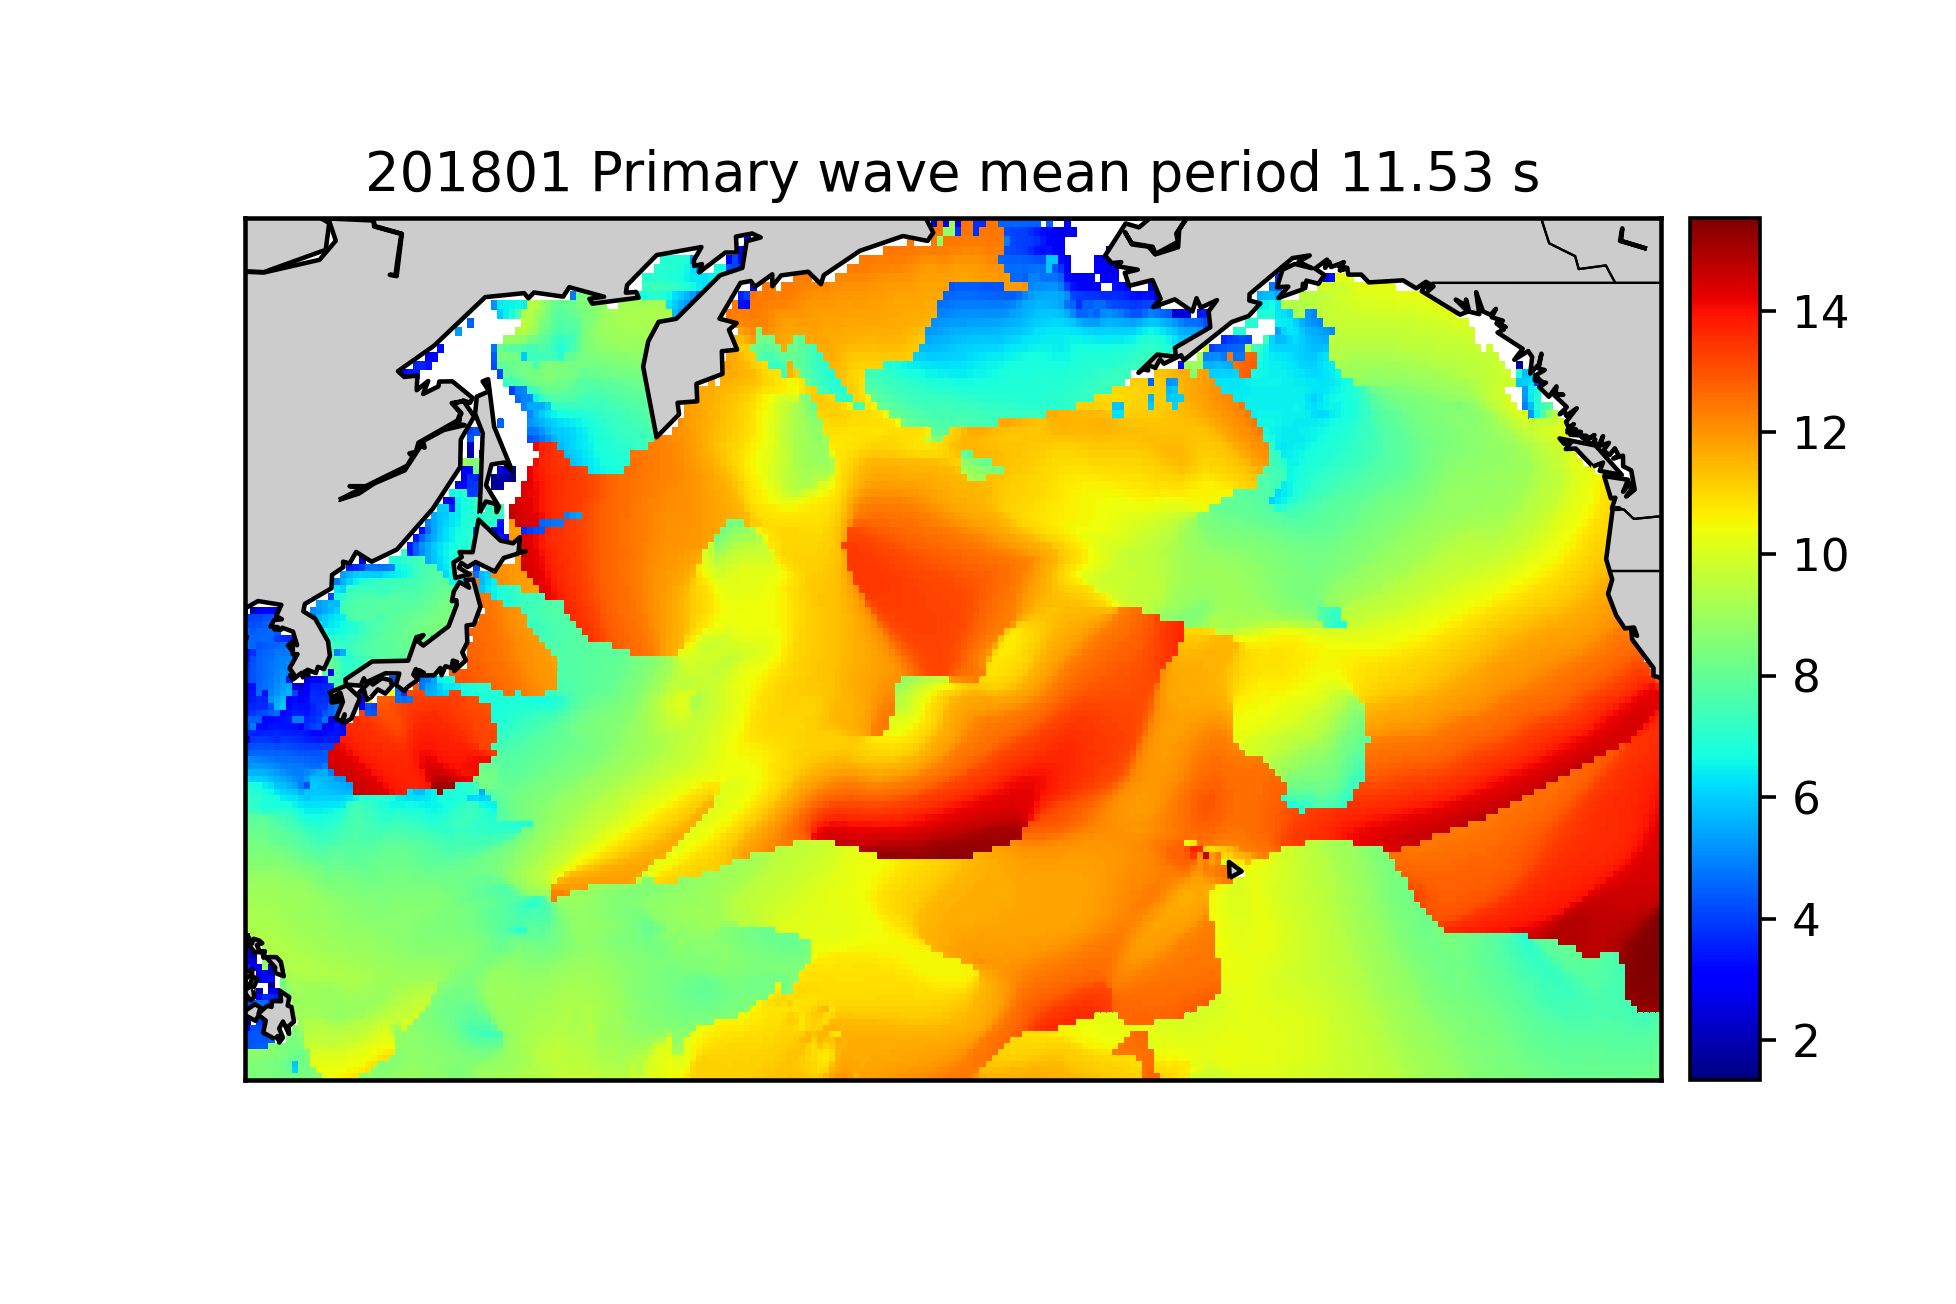

In [47]:
Image("./AnalysisResult/201801/201801.png")